## Contents

1. [Initial Data Exploration](https://www.kaggle.com/code/valentinbelyaev/1-0-intitial-eda-playground-series-s3e24)
2. [Building Baseline Models](https://www.kaggle.com/code/valentinbelyaev/2-0-baseline-model-playground-series-s3e24)
3. [Model ensembles & handle outliers](https://www.kaggle.com/valentinbelyaev/3-0-model-ensemble-playground-series-s3e24)
4. [Tunning XGBoost hyperparameters](https://www.kaggle.com/valentinbelyaev/4-0-model-ensemble-playground-series-s3e24)

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Load & check data before going further.

In [47]:
df_train = pd.read_csv('/kaggle/input/playground-series-s3e24/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')

In [48]:
# Drop id feature.

df_train = df_train.drop(columns=['id'], axis=1)

test_ids = df_test['id']
df_test = df_test.drop(columns=['id'], axis=1)

In [49]:
df_train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1


In [50]:
df_test.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40,165,70,84.0,1.2,1.2,1,1,130,89,...,186,49,115,14.2,1,0.9,19,25,32,0
1,80,160,60,93.0,1.0,1.0,2,2,144,72,...,158,35,104,13.0,1,1.1,20,12,24,0
2,60,170,70,86.5,0.6,0.7,1,1,117,75,...,173,39,88,15.4,1,1.4,38,60,36,0
3,40,160,50,67.0,0.3,0.4,1,1,116,62,...,47,75,128,14.5,1,0.6,25,18,10,1
4,40,170,75,89.4,1.0,0.9,1,1,132,94,...,100,39,123,16.5,1,1.0,30,39,27,1


In [51]:
print(f"Train data shape: {df_train.shape} | Test data shape: {df_test.shape}")

Train data shape: (159256, 23) | Test data shape: (106171, 22)


In [52]:
print(f"Number of NaN's in tranin data: {df_train.isna().sum().sum()}")
print(f"Number of NaN's in test data: {df_test.isna().sum().sum()}")

Number of NaN's in tranin data: 0
Number of NaN's in test data: 0


In [53]:
df_train.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [54]:
df_test.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
count,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,...,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000
mean,44.426538,165.221322,67.125618,82.999892,1.004776,0.999483,1.024216,1.023980,122.475403,76.820676,...,127.406203,55.922286,114.597404,14.793354,1.072798,0.892463,25.559616,26.565427,36.086888,0.195458
std,11.897138,8.837065,12.586569,8.946584,0.397690,0.385752,0.153719,0.152988,12.765542,9.018782,...,66.352488,14.000552,26.943401,1.434296,0.340818,0.179927,9.504442,17.944195,30.928138,0.396555
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,8.000000,18.000000,1.000000,5.000000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,...,77.000000,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,...,114.000000,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,164.000000,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,33.000000,44.000000,0.000000
max,85.000000,190.000000,130.000000,127.700000,9.900000,9.900000,2.000000,2.000000,213.000000,140.000000,...,548.000000,148.000000,1220.000000,21.100000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000


## Feature engineering.

1. Add new features.
2. Handle outliers using inter-quartile range.
3. Handle skewness by taking square root of numeric features.


### Add new features.

In [55]:
def add_features(data):
    data['bmi'] = data['weight(kg)'] / (data['height(cm)'] / 100)**2 # Body mass index.
    data['LDL_HDL'] = data['LDL'] + data['HDL']
    data["Hemo_Gtp"] = data["hemoglobin"] * data["Gtp"]

In [56]:
add_features(df_train)

print(df_train.shape)

(159256, 26)


In [57]:
add_features(df_test)

print(df_test.shape)

(106171, 25)


In [58]:
numeric_features = [
    col for col in df_train.columns
    if (df_train[col].dtype in ['int64', 'float64'] and df_train[col].nunique() > 10)
]

In [59]:
print(numeric_features)

['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'bmi', 'LDL_HDL', 'Hemo_Gtp']


### Handle outliers.

In [60]:
def handle_outliers(data, cols):
    for col in cols:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        
        iqr = q3 - q1
        
        data[col] = data[col].clip(lower=q1 - 1.5 * iqr, upper=q3 + 1.5 * iqr)

In [61]:
handle_outliers(df_train, numeric_features)

In [62]:
df_train.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,bmi,LDL_HDL,Hemo_Gtp
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,44.294727,165.278960,67.067903,82.985894,0.998830,0.994869,1.023974,1.023421,122.442244,76.848565,...,1.074233,0.891970,25.102530,25.746999,33.731841,0.197996,0.437365,24.413190,170.347566,511.138957
std,11.807241,8.780626,12.365353,8.904865,0.307547,0.306726,0.152969,0.151238,12.529206,8.907331,...,0.347856,0.172688,7.171154,12.465921,20.198613,0.398490,0.496063,3.254200,28.138898,326.194081
min,20.000000,145.000000,37.500000,59.000000,0.200000,0.200000,1.000000,1.000000,90.000000,52.000000,...,1.000000,0.500000,6.500000,1.000000,2.000000,0.000000,0.000000,16.316554,86.000000,28.200000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,...,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000,22.222222,149.000000,258.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,...,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000,24.221453,169.000000,409.600000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000,26.159334,191.000000,677.600000
max,77.500000,185.000000,97.500000,107.000000,1.800000,1.800000,2.000000,2.000000,154.000000,100.000000,...,6.000000,1.300000,42.500000,56.000000,83.000000,1.000000,1.000000,32.065002,254.000000,1307.000000


In [63]:
handle_outliers(df_test, numeric_features)

In [64]:
df_test.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,bmi,LDL_HDL,Hemo_Gtp
count,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,...,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000
mean,44.413536,165.233538,67.049514,82.982838,0.998154,0.993873,1.024216,1.023980,122.408727,76.794511,...,14.804120,1.072798,0.891744,25.134086,25.866225,33.726206,0.195458,24.418843,170.457762,510.846883
std,11.859305,8.799682,12.363189,8.889467,0.308144,0.305609,0.153719,0.152988,12.547597,8.928652,...,1.395255,0.340818,0.172598,7.185085,12.740216,20.136059,0.396555,3.246800,28.252933,325.102788
min,20.000000,145.000000,37.500000,59.000000,0.200000,0.200000,1.000000,1.000000,90.000000,52.000000,...,10.800000,1.000000,0.500000,6.500000,1.000000,2.000000,0.000000,16.316554,86.000000,28.200000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,...,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,22.222222,149.000000,258.400000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,...,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,24.221453,169.000000,409.200000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,15.800000,1.000000,1.000000,29.000000,33.000000,44.000000,0.000000,26.159334,191.000000,677.600000
max,77.500000,185.000000,97.500000,107.000000,1.800000,1.800000,2.000000,2.000000,154.000000,100.000000,...,18.800000,6.000000,1.300000,42.500000,58.500000,83.000000,1.000000,32.065002,254.000000,1306.400000


### Handle skewness

In [65]:
def handle_skewness(data, cols):
    for col in cols:
        data[col] = np.sqrt(data[col])

In [66]:
handle_skewness(df_train, numeric_features)

In [67]:
handle_skewness(df_test, numeric_features)

### Plot histograms to see distributions.

*Histograms before handling skewness & outliers are in the first EDA notebook.*

In [68]:
def plot_hist(df):
    num_rows = (len(df.columns) + 2) // 4
    num_cols = min(len(df.columns), 4)

    fix, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4*num_rows))

    axes = axes.flatten()

    for i, feature in enumerate(df.columns[1:]):
        if i < len(axes):
            df[feature].hist(ax=axes[i])
            axes[i].set_title(feature)

    plt.tight_layout()
    plt.show()

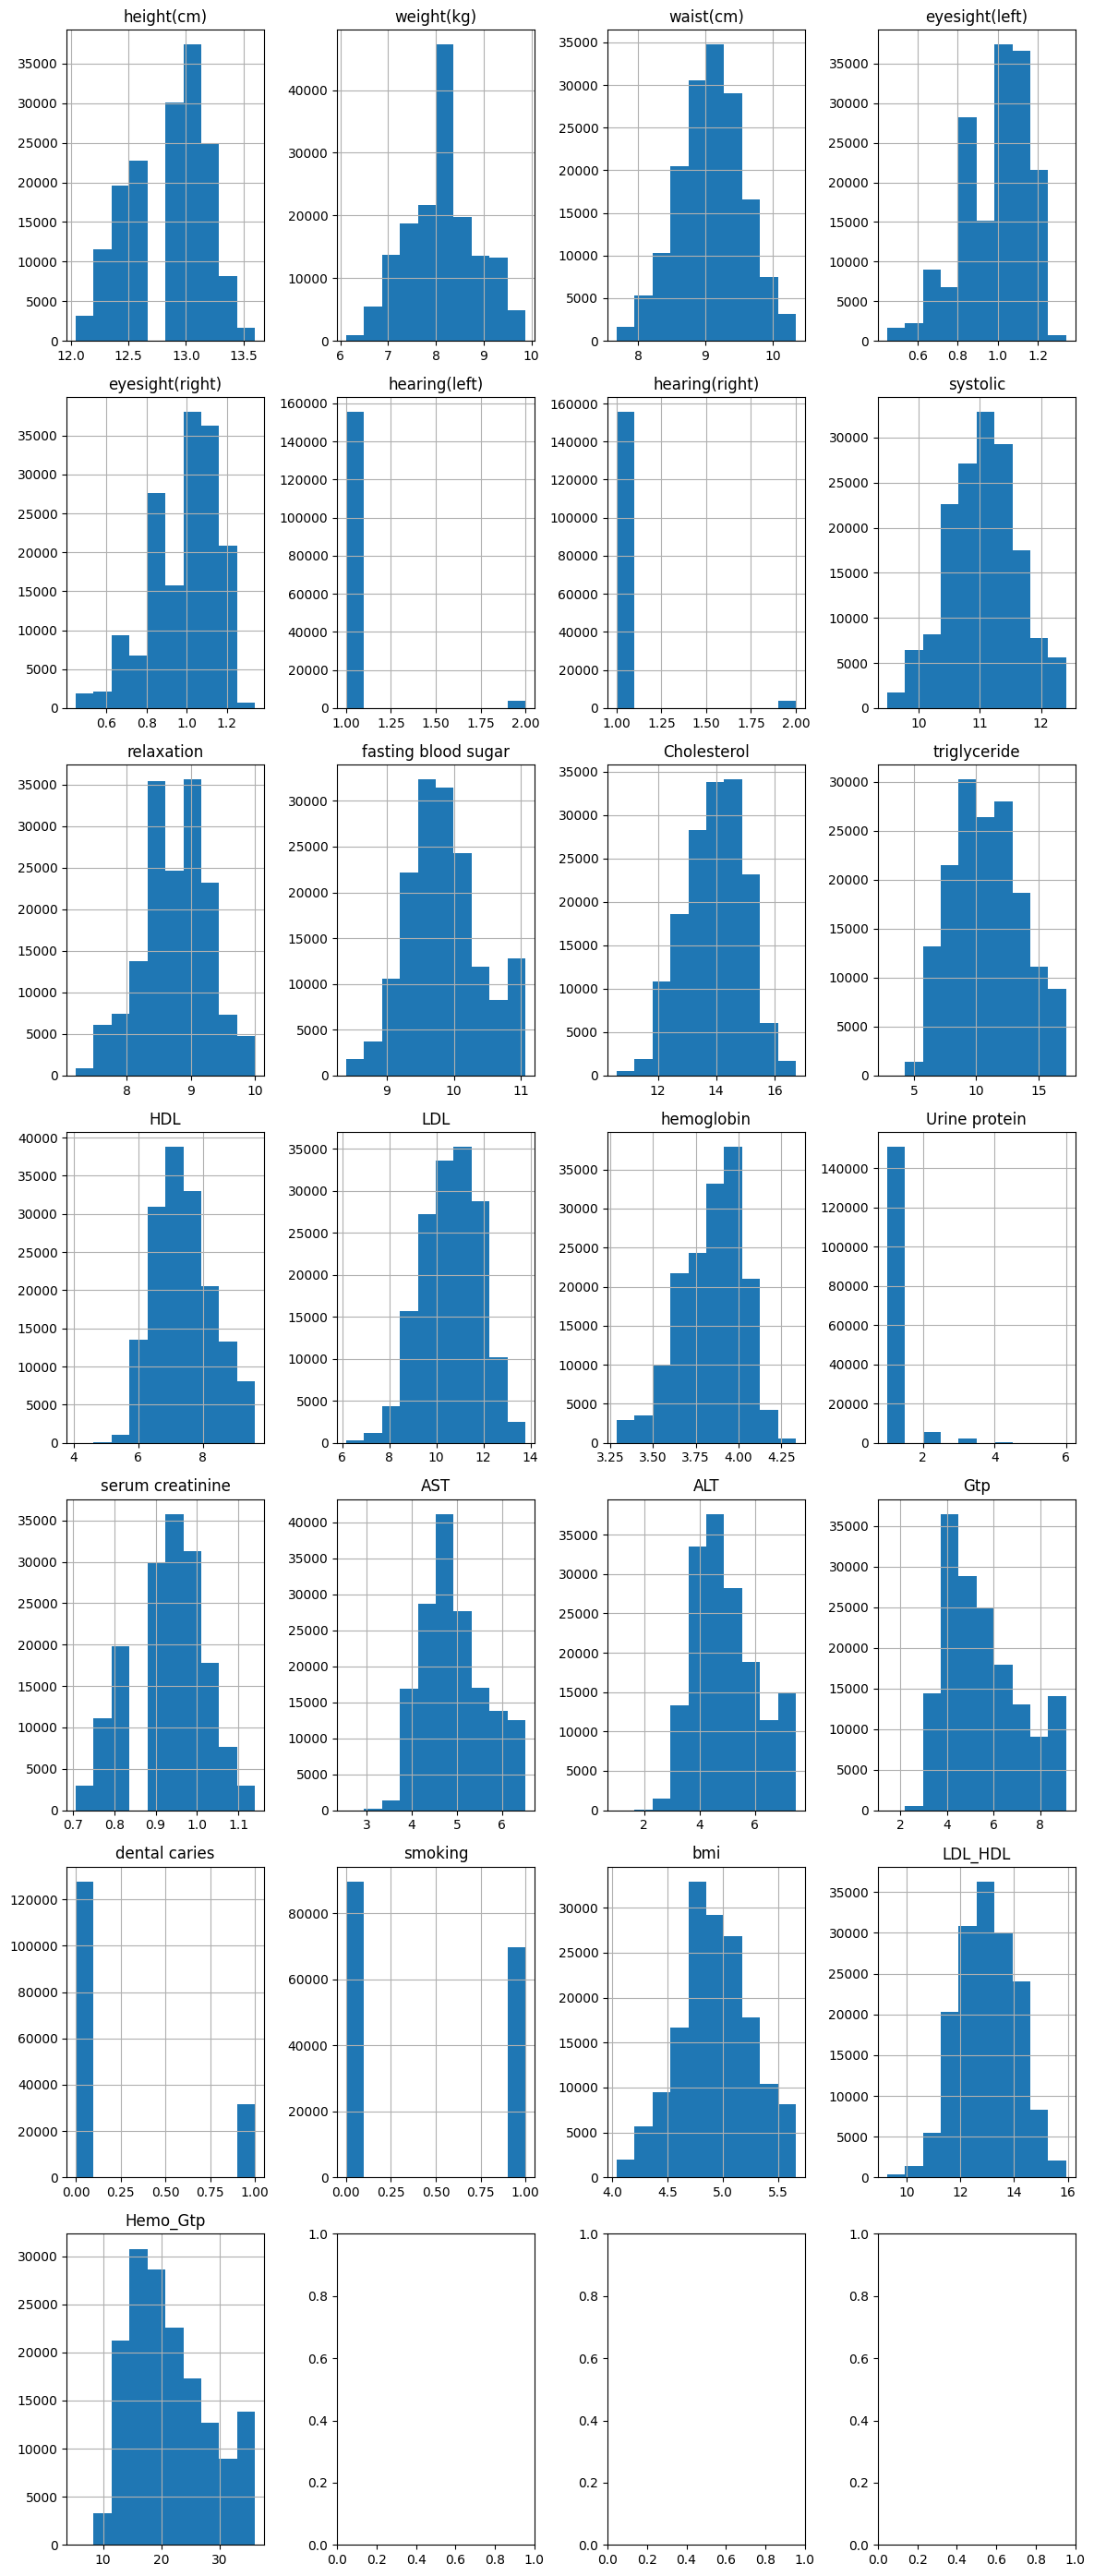

In [69]:
plot_hist(df_train)

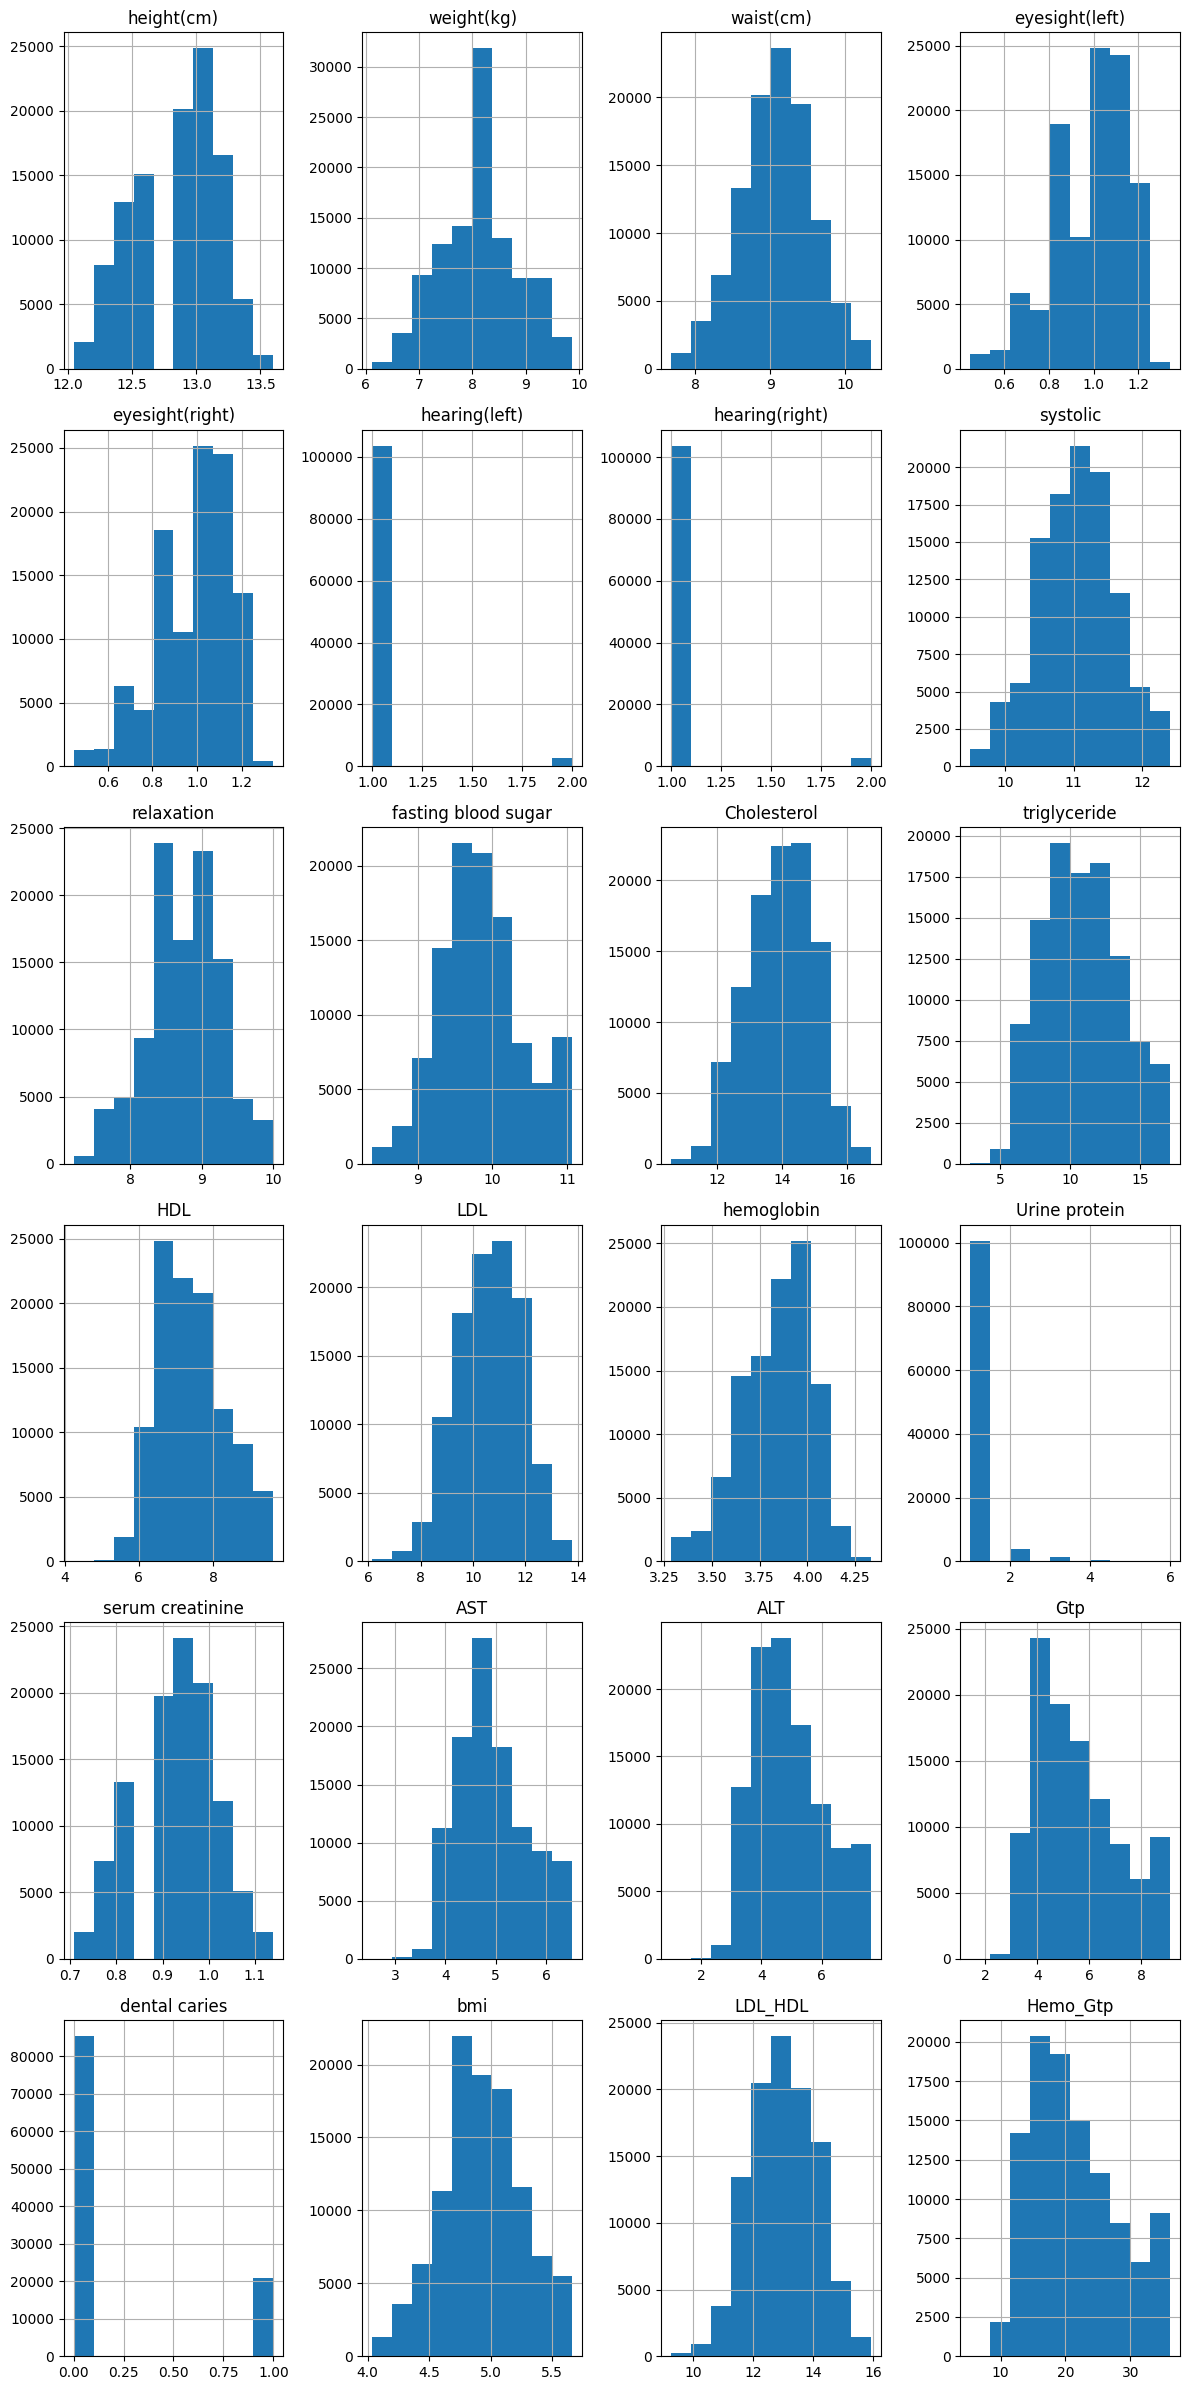

In [70]:
plot_hist(df_test)

## Modeling.

*In previous notebooks I've mistakenly used accuracy for model evaluation, but from now I'll use ROC AUC.*


### Train & validation split.

In [71]:
X, y = df_train.drop(columns=['smoking'], axis=1), df_train['smoking']

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

## Hyperparameter tunning.

### Model complexity.

Firsty, train my boosting models on low number of n_estimators to grind optimal hyperparameters that are responsible for model complexity (*i.e. max_depth, colsample_bytree, subsample, gamma, lambda, etc*).

### Model optimization.

Secondly, use best hyperparameters from model complexity to find optimal values for n_estimators & learning_rate.

### XGBoost (Baseline)


In [73]:
from sklearn.model_selection import StratifiedKFold, validation_curve

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [74]:
default_params = {
    "objective": "binary:logistic",
    "max_depth": 1,
    "learning_rate": 0.1,
}

# Changed for speeding up saving process
# n_estimators = np.linspace(1, 200, 10).astype("int") 

n_estimators = np.linspace(1, 100, 20).astype("int")

In [75]:
from xgboost import XGBClassifier

In [76]:
train_scores, test_scores = validation_curve(
    XGBClassifier(**default_params),
    X_train,
    y_train,
    param_name="n_estimators",
    param_range=n_estimators,
    cv=cv.split(X_train, y_train),
    scoring="roc_auc",
    n_jobs=-1,
)

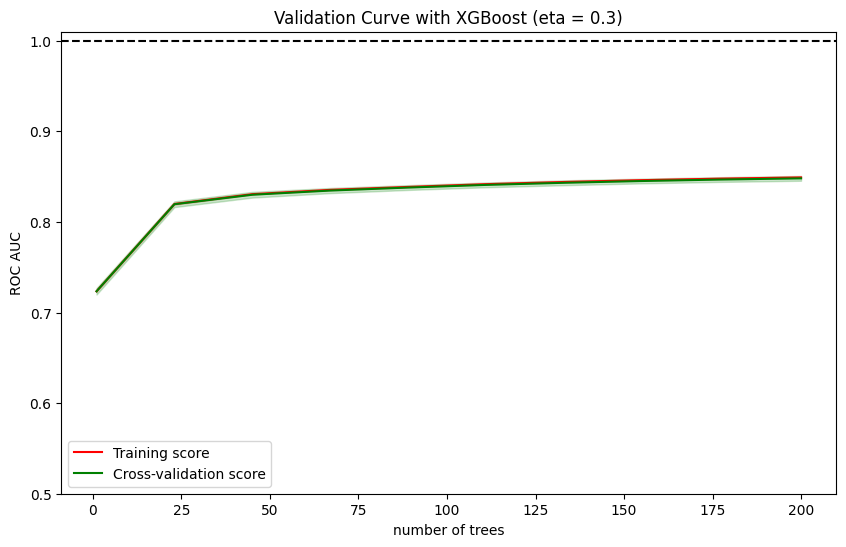

Best cross-validation result (0.85) obtained for 200 trees


In [77]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

fig = plt.figure(figsize=(10, 6), dpi=100)

plt.title("Validation Curve with XGBoost (eta = 0.3)")
plt.xlabel("number of trees")
plt.ylabel("ROC AUC")
plt.ylim(0.5, 1.01)

plt.plot(n_estimators, train_scores_mean, label="Training score", color="r")

plt.plot(
    n_estimators, test_scores_mean, label="Cross-validation score", color="g"
)

plt.fill_between(
    n_estimators,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="r",
)

plt.fill_between(
    n_estimators,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="g",
)

plt.axhline(y=1, color="k", ls="dashed")

plt.legend(loc="best")
plt.show()

i = np.argmax(test_scores_mean)
print(
    "Best cross-validation result ({0:.2f}) obtained for {1} trees".format(
        test_scores_mean[i], n_estimators[i]
    )
)

### XGBoost (Manual Tune #1)

*Slightly increase max_depth and add new hyperparameters to tune*

In [78]:
new_params = {
    "objective": "binary:logistic",
    "max_depth": 2,  # Changed
    "learning_rate": 0.1,
    "colsample_bytree": 0.6,  # Added
    "subsample": 0.7, # Added
    "seed": 42,
}

# Changed for speeding up saving process
# n_estimators = np.linspace(1, 200, 10).astype("int") 

n_estimators = np.linspace(1, 100, 20).astype("int")

In [79]:
train_scores, test_scores = validation_curve(
    XGBClassifier(**new_params),
    X_train,
    y_train,
    param_name="n_estimators",
    param_range=n_estimators,
    cv=cv.split(X_train, y_train),
    scoring="roc_auc",
    n_jobs=-1,
)

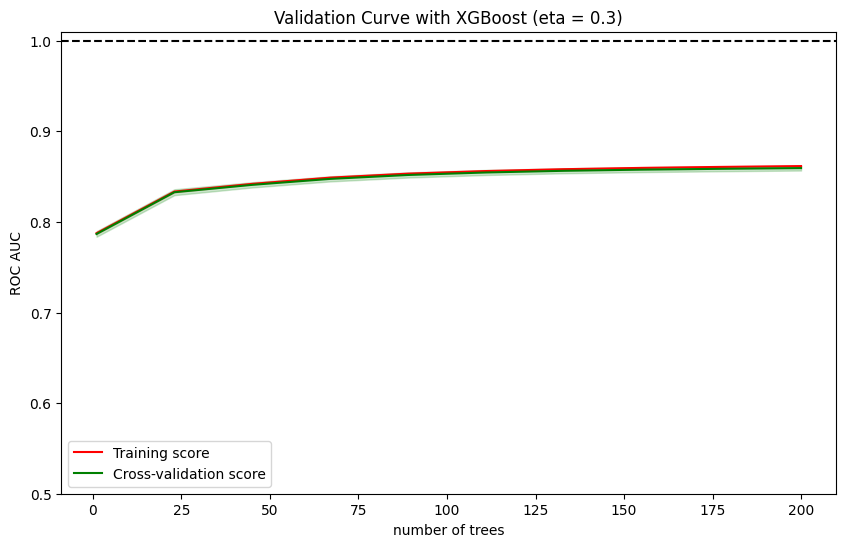

Best cross-validation result (0.86) obtained for 200 trees


In [80]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

fig = plt.figure(figsize=(10, 6), dpi=100)

plt.title("Validation Curve with XGBoost (eta = 0.3)")
plt.xlabel("number of trees")
plt.ylabel("ROC AUC")
plt.ylim(0.5, 1.01)

plt.plot(n_estimators, train_scores_mean, label="Training score", color="r")

plt.plot(
    n_estimators, test_scores_mean, label="Cross-validation score", color="g"
)

plt.fill_between(
    n_estimators,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="r",
)

plt.fill_between(
    n_estimators,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="g",
)

plt.axhline(y=1, color="k", ls="dashed")

plt.legend(loc="best")
plt.show()

i = np.argmax(test_scores_mean)
print(
    "Best cross-validation result ({0:.2f}) obtained for {1} trees".format(
        test_scores_mean[i], n_estimators[i]
    )
)

### XGBoost (Manual Tune #2)

*In this part of tunning I'll increase model complexity by a descent amount. Main focus to increasae max_depth and decrease regularization.*

In [81]:
new_params = {
    "objective": "binary:logistic",
    "max_depth": 8,  # Changed 2 -> 8
    "learning_rate": 0.1,
    "colsample_bytree": 0.5,  # Decreased 0.6 -> 0.5
    "subsample": 0.6,  # Added
    'lambda': 0.3, # Added (default = 1)
    "seed": 42,
}

# Changed for speeding up saving process
# n_estimators = np.linspace(1, 200, 10).astype("int") 

n_estimators = np.linspace(1, 100, 20).astype("int")

In [82]:
train_scores, test_scores = validation_curve(
    XGBClassifier(**new_params),
    X_train,
    y_train,
    param_name="n_estimators",
    param_range=n_estimators,
    cv=cv.split(X_train, y_train),
    scoring="roc_auc",
    n_jobs=-1,
)

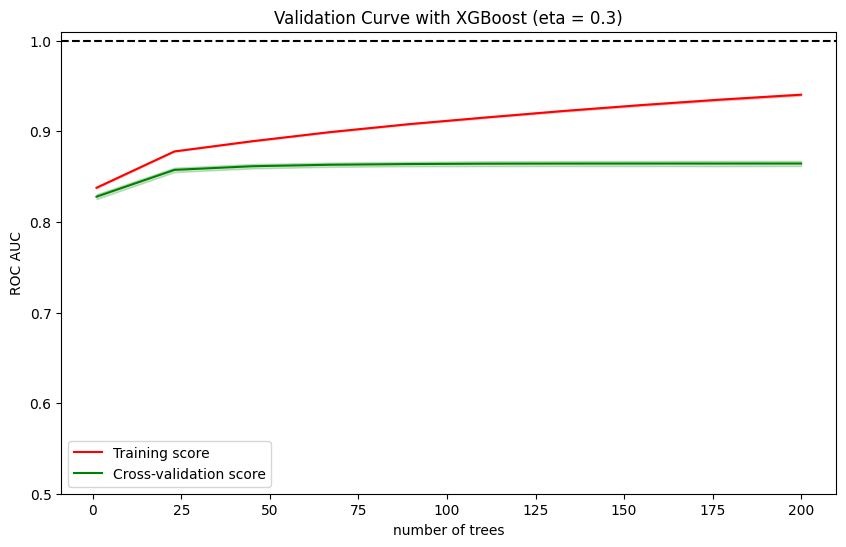

Best cross-validation result (0.86) obtained for 200 trees


In [83]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

fig = plt.figure(figsize=(10, 6), dpi=100)

plt.title("Validation Curve with XGBoost (eta = 0.3)")
plt.xlabel("number of trees")
plt.ylabel("ROC AUC")
plt.ylim(0.5, 1.01)

plt.plot(n_estimators, train_scores_mean, label="Training score", color="r")

plt.plot(
    n_estimators, test_scores_mean, label="Cross-validation score", color="g"
)

plt.fill_between(
    n_estimators,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="r",
)

plt.fill_between(
    n_estimators,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="g",
)

plt.axhline(y=1, color="k", ls="dashed")

plt.legend(loc="best")
plt.show()

i = np.argmax(test_scores_mean)
print(
    "Best cross-validation result ({0:.2f}) obtained for {1} trees".format(
        test_scores_mean[i], n_estimators[i]
    )
)

### XGBoost (Manual Tune #3)

In [84]:
new_params = {
    "objective": "binary:logistic",
    "max_depth": 5,  
    "learning_rate": 0.1,
    "colsample_bytree": 0.6,  
    "subsample": 0.75,  
    "seed": 42,
}

# Changed for speeding up saving process
# n_estimators = np.linspace(1, 200, 10).astype("int") 

n_estimators = np.linspace(1, 100, 20).astype("int")

In [86]:
train_scores, test_scores = validation_curve(
    XGBClassifier(**new_params),
    X_train,
    y_train,
    param_name="n_estimators",
    param_range=n_estimators,
    cv=cv.split(X_train, y_train),
    scoring="roc_auc",
    n_jobs=-1,
)

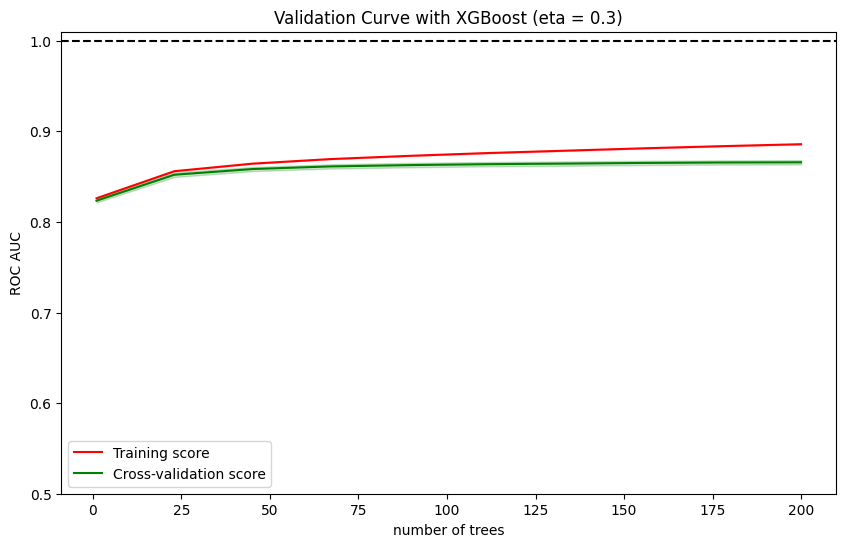

Best cross-validation result (0.87) obtained for 200 trees


In [87]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

fig = plt.figure(figsize=(10, 6), dpi=100)

plt.title("Validation Curve with XGBoost (eta = 0.3)")
plt.xlabel("number of trees")
plt.ylabel("ROC AUC")
plt.ylim(0.5, 1.01)

plt.plot(n_estimators, train_scores_mean, label="Training score", color="r")

plt.plot(
    n_estimators, test_scores_mean, label="Cross-validation score", color="g"
)

plt.fill_between(
    n_estimators,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="r",
)

plt.fill_between(
    n_estimators,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="g",
)

plt.axhline(y=1, color="k", ls="dashed")

plt.legend(loc="best")
plt.show()

i = np.argmax(test_scores_mean)
print(
    "Best cross-validation result ({0:.2f}) obtained for {1} trees".format(
        test_scores_mean[i], n_estimators[i]
    )
)

### XGBoost (RandomizedSearchCV)

In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [118]:
# rs_cv_params = {
#     "objective": ["binary:logistic"],
#     "max_depth": np.arange(2, 10, 1),  
#     "n_estimators": [40], # Fix to small number.
#     "learning_rate": [0.1],
#     "gamma": np.arange(0.5, 1, 0.01),
#     "colsample_bytree": np.arange(0.5, 1, 0.05),  
#     "subsample": np.arange(0.5, 1, 0.05),  
#     "seed": [42],
# }

# These are best params for this stage.
rs_cv_params = {
    "objective": ["binary:logistic"],
    'max_depth': [9],
    "n_estimators": [40],
    "learning_rate": [0.1], # Decrease
    "gamma": [0.79],
    "colsample_bytree": [0.55],
    "subsample": [0.8],
    "seed": [42],
}


In [119]:
xgb = XGBClassifier()

xgb_clf = RandomizedSearchCV(xgb, rs_cv_params, n_iter=40, cv=5, random_state=42, n_jobs=-1, scoring='roc_auc')
xgb_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                                        'learning_rate': [0.1],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': [40],
                                        'objective': ['binary:logistic'],
                                        'seed': [42],
                                        'subsample': array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
                   random_state=42, scoring='roc_auc')

In [120]:
print("ROC AUC score for RandomizedSearchCV - {}".format(xgb_clf.best_score_))

ROC AUC score for RandomizedSearchCV - 0.8609860217262846


In [124]:
best_xgb = xgb_clf.best_estimator_

In [125]:
xgb_clf.best_params_

{'subsample': 0.8000000000000003,
 'seed': 42,
 'objective': 'binary:logistic',
 'n_estimators': 40,
 'max_depth': 9,
 'learning_rate': 0.1,
 'gamma': 0.7900000000000003,
 'colsample_bytree': 0.55}

In [126]:
from sklearn.metrics import roc_auc_score

print("XGBoost (RandomizedSearchCV)")

y_pred_train = best_xgb.predict_proba(X_train)[:, 1]
roc_auc_train = roc_auc_score(y_train, y_pred_train)
print(f"ROC AUC score on training set: {roc_auc_train*100}%")

y_pred_valid = best_xgb.predict_proba(X_valid)[:, 1]
roc_auc_val = roc_auc_score(y_valid, y_pred_valid)
print(f"ROC AUC score on validation set: {roc_auc_val*100}%")

XGBoost (RandomizedSearchCV)
ROC AUC score on training set: 89.90172076252207%
ROC AUC score on validation set: 86.06075688056792%


In [128]:
# Tune n_estimators on hyperparameters from xgb_clf.best_params_.

# rs_cv_params = {
#     "objective": ["binary:logistic"],
#     'max_depth': [9],
#     "n_estimators": np.arange(100, 1000, 50),
#     "learning_rate": [0.05], # Decrease
#     "gamma": [0.79],
#     "colsample_bytree": [0.55],
#     "subsample": [0.8],
#     "seed": [42],
# }

rs_cv_params = {
    "objective": ["binary:logistic"],
    'max_depth': [9],
    "n_estimators": [450],
    "learning_rate": [0.05], # Decrease
    "gamma": [0.79],
    "colsample_bytree": [0.55],
    "subsample": [0.8],
    "seed": [42],
}



In [129]:
xgb = XGBClassifier()

xgb_clf = RandomizedSearchCV(xgb, rs_cv_params, n_iter=20, cv=5, random_state=42, n_jobs=-1, scoring='roc_auc')
xgb_clf.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           predictor=None, random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.55],
                                        'gamma': [0.79],
                                        'learning_rate': [0.05],
                                        'max_depth': [9],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950]),
                                        'objective': ['binary:logistic'],
                                        'seed': [42], 'subsample': [0.8]},
                   random_state=42, scoring='roc_auc')

In [131]:
print("ROC AUC score for XGBoost (tuned n_estiamtors) - {}".format(xgb_clf.best_score_))

ROC AUC score for XGBoost (tuned n_estiamtors) - 0.866582518264377


In [132]:
best_xgb = xgb_clf.best_estimator_

In [133]:
xgb_clf.best_params_

{'subsample': 0.8,
 'seed': 42,
 'objective': 'binary:logistic',
 'n_estimators': 450,
 'max_depth': 9,
 'learning_rate': 0.05,
 'gamma': 0.79,
 'colsample_bytree': 0.55}

In [134]:
from sklearn.metrics import roc_auc_score

print("XGBoost (RandomizedSearchCV)")

y_pred_train = best_xgb.predict_proba(X_train)[:, 1]
roc_auc_train = roc_auc_score(y_train, y_pred_train)
print(f"ROC AUC score on training set: {roc_auc_train*100}%")

y_pred_valid = best_xgb.predict_proba(X_valid)[:, 1]
roc_auc_val = roc_auc_score(y_valid, y_pred_valid)
print(f"ROC AUC score on validation set: {roc_auc_val*100}%")

XGBoost (RandomizedSearchCV)
ROC AUC score on training set: 96.82428406470677%
ROC AUC score on validation set: 86.5880851431785%


### Predictions

In [136]:
y_pred = xgb_clf.predict_proba(df_test)

In [137]:
submission_df = pd.DataFrame()
submission_df['id'] = test_ids
submission_df['smoking'] = y_pred[:,1]
submission_df.head()

,id,smoking
0,159256,0.612681
1,159257,0.150619
2,159258,0.347970
3,159259,0.007484
4,159260,0.624575


In [138]:
submission_df.to_csv('tuned_xgb.csv', index=False)